<a href="https://colab.research.google.com/github/amoralles/ProjetoFinal_M4/blob/main/ProjetoFinal_M4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color ='#DAA520'><b>Resilia - Data Analytics: Módulo 4 💻</b></font>

<font size='4'>Você e a sua equipe foram escalados pela <b>Agência Nacional de Petróleo e Gás Natural e Biocombustíveis (ANP)</b> para <b><font color = '#92D1C3'>realizar uma análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol.</b></font>

Serão utilizados os arquivos dos dois últimos meses do ano atual contendo a série histórica dos preços da gasolina e do etanol em todo o Brasil que estão disponíveis no portal [dados.gov](https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda). </font>

- <font size='3'>Inicialmente, realizamos a importação das seguintes bibliotecas: <b>pandas, numpy, datetime e seaborn.</b></font>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sn
import matplotlib.pyplot as plt

#<font color ='#DAA520'><b>Limpeza e Preparação dos Dados 🧹</b></font>

Primeiro passo é a importação dos dados da base de dados do governo. Iremos utilizar os dados de Julho e Agosto para essa análise. Em seguida, podemos ver como estão organizado os dados em embos os arquivos. São semelhantes em colunas.

In [ ]:
julho = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-07.csv', delimiter=';')

In [ ]:
agosto = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-08.csv', delimiter=';')

In [ ]:
dados_jul = pd.DataFrame(julho)
dados_jul.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,"7,38",NaN,R$ / litro,VIBRA ENERGIA


In [ ]:
dados_ago = pd.DataFrame(agosto)
dados_ago.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,ETANOL,01/08/2022,"4,79",NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,GASOLINA,01/08/2022,"5,59",NaN,R$ / litro,VIBRA ENERGIA


Sendo assim, podemos concatenar os dados e uni-los em um único *DataFrame*, ja que são compostos pelas mesmas colunas. 

In [ ]:
conj_dados = pd.concat([dados_jul, dados_ago], ignore_index = True)
conj_dados.head(1)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA


In [ ]:
dados_jul.shape

(57632, 16)

In [ ]:
dados_ago.shape

(69544, 16)

In [ ]:
conj_dados.shape

(127176, 14)

Podemos notar a cima que os dados foram corretamente concatenados (a quantidade de linhas de *conj_dados* é igual à soma das linhas de cada *DataFrame* individual) e as colunas devidamente excluídas. 

Em seguida, avaliamos a quantidade de dados nulos em casa coluna. É possível observar que há uma coluna 100% em branco ('Valor de Compra'). Complemento é uma coluna que também há muitos dados faltantes. 

In [ ]:
(conj_dados.isnull().mean() * 100).sort_values(ascending=False)

Bairro               0.323960
Numero Rua           0.055828
Regiao - Sigla       0.000000
Estado - Sigla       0.000000
Municipio            0.000000
Revenda              0.000000
CNPJ da Revenda      0.000000
Nome da Rua          0.000000
Cep                  0.000000
Produto              0.000000
Data da Coleta       0.000000
Valor de Venda       0.000000
Unidade de Medida    0.000000
Bandeira             0.000000
dtype: float64

Podemos então excluir essas colunas, uma vez que elas não serão relevantes para as análises que iremos realizar. 

In [ ]:
conj_dados = conj_dados.drop(['Valor de Compra'], axis=1)
conj_dados = conj_dados.drop(['Complemento'], axis=1)
conj_dados.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,LACE,29703-030,GASOLINA ADITIVADA,2022-07-01,7.48,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,LACE,29703-030,GASOLINA,2022-07-01,7.38,R$ / litro,VIBRA ENERGIA


É possível observar também que na coluna de 'Valor de Venda' os valores estão com os decimais divididos por vírgula, e que são do tipo *string*. Sendo assim, é necessário transformar a vírgula em ponto e o tipo do dado em número para podermos realizar as operações. Pra isso, usaremos uma função que substitua vírgula por ponto e faça um *casting* do dado que o transforma de *string*, sua forma original, em *float*.

In [ ]:
type(conj_dados['Valor de Venda'][0])

numpy.float64

In [ ]:
conj_dados['Valor de Venda'] = conj_dados['Valor de Venda'].apply(lambda y: float(str(y.replace(',','.'))))
conj_dados.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,2022-07-01,7.48,NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,2022-07-01,7.38,NaN,R$ / litro,VIBRA ENERGIA


Podemos ver que o problema foi resolvido:


In [ ]:
type(conj_dados['Valor de Venda'][0])

str

A coluna de 'Data da Coleta' também é uma *string*. Para podermos realizar operações com ela é necessário que a transformemos em data.

In [ ]:
conj_dados['Data da Coleta'] = pd.to_datetime(conj_dados['Data da Coleta'], format = '%d/%m/%Y')


In [ ]:
conj_dados.head(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,"7,38",NaN,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,01/07/2022,"5,99",NaN,R$ / litro,VIBRA ENERGIA


In [ ]:
conj_dados['Data da Coleta'][0]


'01/07/2022'

Como iremos trabalhar majoritariamente como o calor de venda dos produtos, podemos analisar a distribuição desses valores. Pra isso podemos plotar um histograma.

AttributeError: ignored

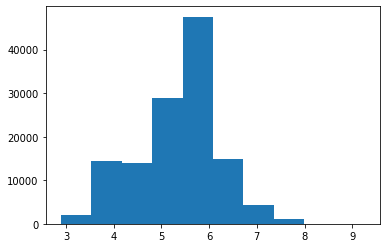

In [ ]:
conj_dados['Valor de Venda'].hist();

Nele é possível observar que a maioria dos valores encontram-se entre 5 e 6 ao longo do período analisado. Podemos ainda ir além e avaliarmos se há algum valor muito discrepante de valor de venda, através de um gráfico Box Plot

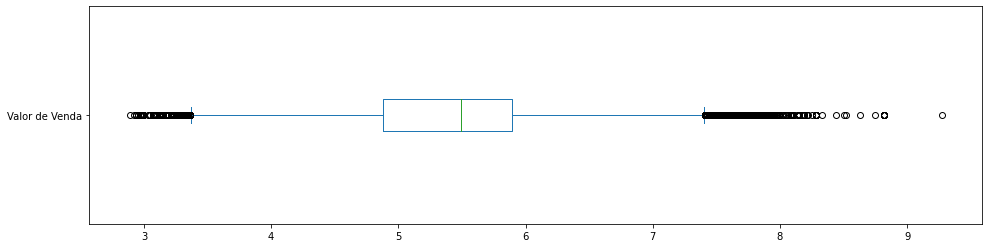

In [ ]:
conj_dados['Valor de Venda'].plot(kind='box', vert = False, figsize = (16,4));

Podemos ver a presença de inúmeros *outliers*. Dados em séries temporais podem sofrer diversas alterações inesperadas, como mudança política, crises econômicas, erros de medida, erros de digitação, etc. Para a presente análise, optamos por não remover nenhum valor discrepante, uma vez que pela análise do bloxpot eles são muitos, o que poderia impactar no nosso volume de dados.

#<font color ='#DAA520'><b>Análise 📓</b></font>

Quando analizamos séries temporais, ou seja, quando temos uma coleção de obserações ao longo do tempo, instintivamente nos perguntamos: Como essas obervações se alteraram ao longo do período de observações? Nessa análise, tentamos responder as seguintes perguntas:

##<font color ='#DAA520'><b>1. Como se comportaram o preço dos combustíveis durante os dois meses citados?</b></font>

Os valores do etanol e da gasolina tiveram uma de queda ou diminuição?

Para isso, selecionamos um *subset* do dataframe original apenas com as informações relevantes para essa respota: Qual o produto iremos avaliar, o valor que o produto foi vendido e quando. Calculamos uma média por dia do valor desse produto, para que pudessemos ter uma visão mais geral do valor do produto.

In [ ]:
preco_por_dia = conj_dados.groupby(['Data da Coleta', 'Produto']).mean('Valor de Venda')
preco_por_dia

Valor de Venda
Data da Coleta Produto                           
2022-07-01     ETANOL                    5.395652
               GASOLINA                  7.173200
               GASOLINA ADITIVADA        7.248261
2022-07-04     ETANOL                    4.879523
               GASOLINA                  6.612834
...                                           ...
2022-08-30     GASOLINA                  5.213140
               GASOLINA ADITIVADA        5.399597
2022-08-31     ETANOL                    3.994470
               GASOLINA                  5.194275
               GASOLINA ADITIVADA        5.354558

[132 rows x 1 columns]

Em seguida, optamos por resetar os valores do índice, de forma que a Data da Coleta passase a ser uma coluna de dados, e não o índice do dataset. 

In [ ]:
preco_por_dia.reset_index(inplace= True)
preco_por_dia.head(2)

,Data da Coleta,Produto,Valor de Venda
0,2022-07-01,ETANOL,5.395652
1,2022-07-01,GASOLINA,7.173200


In [ ]:
preco_por_dia.shape[:]

(132, 3)

Para melhor visualizar a tendência no preço dos  produtos, plotamos um gráfico de linhas para cada um dos três produtos observados ao longo dos meses. 📈📉

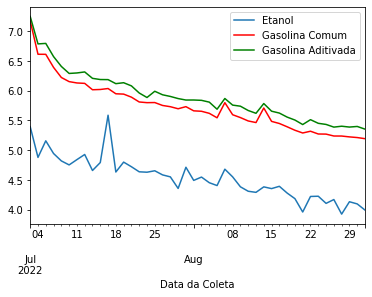

In [ ]:
graf1 = preco_por_dia[preco_por_dia['Produto'] == 'ETANOL'].plot.line(x='Data da Coleta', y='Valor de Venda', label = 'Etanol')
graf2 = preco_por_dia[preco_por_dia['Produto'] == 'GASOLINA'].plot.line(x='Data da Coleta', y='Valor de Venda', color = 'red', label = 'Gasolina Comum', ax=graf1 )
graf3 = preco_por_dia[preco_por_dia['Produto'] == 'GASOLINA ADITIVADA'].plot.line(x='Data da Coleta', y='Valor de Venda', color = 'green', label = 'Gasolina Aditivada', ax=graf2 )

Com isso, podemos observar que de julho de 2022 até o final de agosto de 2022, o valor da Gasolina (comum ou aditivada) e o valor do etanol, em média, diminuiram. 

##<font color ='#DAA520'><b>2. Qual o preço médio da gasolina e do etanol nesses dois meses?</b></font>

Para calcular o preço médio dos produtos nesses dois meses , realizamos um subset em que selecionamos somente o produto e o valor de venda final. Com isso utilizamos a fórmula da média para conseguir obter o resultado desejado.

In [ ]:
preco_medio_tempo= round(conj_dados.groupby(['Produto']).mean('Valor de Venda'),2)

preco_medio_tempo


,Valor de Venda
Produto,
ETANOL,4.51
GASOLINA,5.71
GASOLINA ADITIVADA,5.89


##<font color ='#DAA520'><b>3. Qual o preço médio da gasolina e do etanol por estado?</b></font>

Podemos também avaliar qual a média de preços por estado ao fim desses dois meses. Para isso, agrupamos os valores de média de 'Valor de Venda' por tipo de produto e estado em que é vendido.

In [ ]:
preco_med_estado= conj_dados.groupby(['Estado - Sigla', 'Produto']).mean('Valor de Venda')
preco_med_estado

Valor de Venda
Estado - Sigla Produto                           
AC             ETANOL                    5.376684
               GASOLINA                  6.211454
               GASOLINA ADITIVADA        6.177801
AL             ETANOL                    5.240854
               GASOLINA                  5.944651
...                                           ...
SP             GASOLINA                  5.527844
               GASOLINA ADITIVADA        5.773200
TO             ETANOL                    5.151095
               GASOLINA                  6.046250
               GASOLINA ADITIVADA        6.176667

[81 rows x 1 columns]

Essas informações bom ser melhor visualizadas em forma de gráfico.

In [ ]:
preco_med_estado.reset_index(inplace = True)
pme_etanol = preco_med_estado[preco_med_estado['Produto'] == 'ETANOL']
pme_gasolina = preco_med_estado[preco_med_estado['Produto'] == 'GASOLINA']
pme_gas_adtv = preco_med_estado[preco_med_estado['Produto'] == 'GASOLINA ADITIVADA']

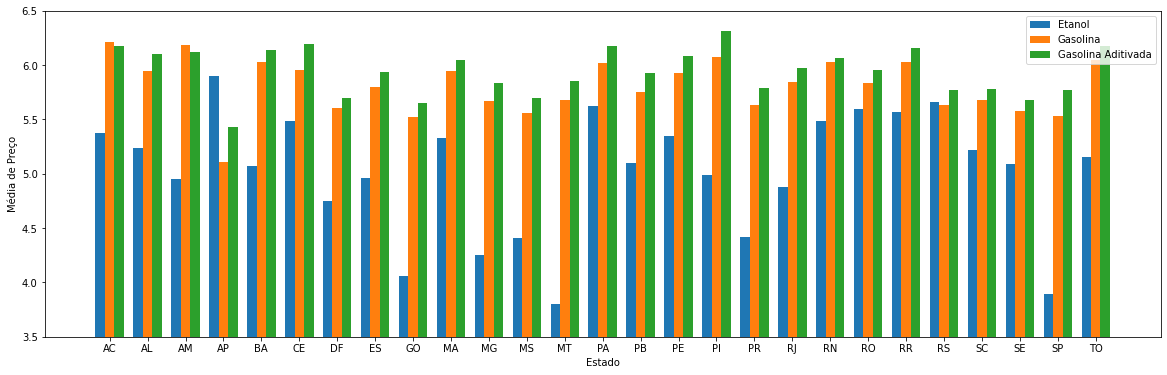

In [ ]:
barWidth = 0.25
plt.figure(figsize = (20,6))
r1 = np.arange(len(pme_etanol['Estado - Sigla']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, pme_etanol['Valor de Venda'], label = 'Etanol', width = barWidth)
plt.bar(r2, pme_gasolina['Valor de Venda'], label = 'Gasolina', width = barWidth)
plt.bar(r3, pme_gas_adtv['Valor de Venda'], label = 'Gasolina Aditivada', width = barWidth)
plt.xlabel('Estado')
plt.ylabel('Média de Preço')
plt.xticks([r + barWidth for r in range(len(pme_etanol['Estado - Sigla']))], pme_etanol['Estado - Sigla'].tolist())
plt.ylim(3.5,6.5)
plt.legend();

Podemos observar no gráfico acima que os menores preço médio para o etanol são os de GO, MT e SP. Ainda, a gasolina aditivada costuma ser mais cara que a gasolina comum. 

##<font color ='#DAA520'><b>4. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?</b></font>

Podemos explorar ainda mais as informações do gráfico anterior. Como por exemplo: Quais estados com o combustível mais caro?

###<font color ='#DAA520'><b>ETANOL</b></font>


Aqui criamos um substet com as informações apenas dos registros de Etanol. Ele será util mais a frente.

In [ ]:
dados_etanol = conj_dados.loc[(conj_dados['Produto']=='ETANOL')]

In [ ]:
preco_medio_etanol = dados_etanol.groupby('Estado - Sigla').mean('Valor de Venda').sort_values('Valor de Venda',ascending = False)
preco_medio_etanol.head()

,Valor de Venda
Estado - Sigla,
AP,5.896250
RS,5.660152
PA,5.624816
RO,5.599120
RR,5.568182


Dessa forma, os estados com o etanol mais caro são Amapá, Rio Grande do Sul, Pará, Rondonia e Roraima.

###<font color ='#DAA520'><b>GASOLINA</b></font>


De forma semelhante, criamos um substet com as informações apenas dos registros de Gasolina

In [ ]:
dados_gasolina = conj_dados.loc[(conj_dados['Produto']=='GASOLINA')]

In [ ]:
preco_medio_gasolina = dados_gasolina.groupby('Estado - Sigla').mean('Valor de Venda').sort_values('Valor de Venda',ascending = False)
preco_medio_gasolina.head()

,Valor de Venda
Estado - Sigla,
AC,6.211454
AM,6.188049
PI,6.075050
TO,6.046250
BA,6.030862


De forma análoga, os estados com a gasolina mais cara foram Acre, Amazonas, Piauí, Tocantins e Bahia. 

##<font color ='#DAA520'><b>5. Qual o município que possui o maior preço para a gasolina e para o etanol?</b></font>

Para essa pesquisa localizamos o produto específico como a gasolina e o etanol na coluna "Produto", nessa pesquisa selecionamos series especificas e em seguida, com base nessas series procuramos o maior valor referente à coluna "Valor de venda" para cada produto, no final informamos qual o o maior valor de venda de cada produto e em qual município. O . loc nos auxiliou a localizar e especificar series e o .idxmax nos informou o maior valor.

In [ ]:
max_gasolina_mun = dados_gasolina.loc[(dados_gasolina['Valor de Venda'].idxmax())]
max_gasolina_mun = max_gasolina_mun[['Municipio','Estado - Sigla', 'Valor de Venda']]
max_gasolina_mun

#O Município com maior valor de gasolina

Municipio         GURUPI
Estado - Sigla        TO
Valor de Venda      8.75
Name: 88341, dtype: object

In [ ]:
max_etanol_mun = dados_etanol.loc[(dados_etanol['Valor de Venda'].idxmax())]
max_etanol_mun = max_etanol_mun[['Municipio', 'Estado - Sigla', 'Valor de Venda']]
max_etanol_mun
#O Município com maior valor de etanol

Municipio         BAGE
Estado - Sigla      RS
Valor de Venda    7.89
Name: 9260, dtype: object

In [ ]:
dados_gas_adtv = conj_dados.loc[(conj_dados['Produto']=='GASOLINA ADITIVADA')]
max_gas_adtv_mun = dados_gas_adtv.loc[(dados_gas_adtv['Valor de Venda'].idxmax())]
max_gas_adtv_mun = max_gas_adtv_mun[['Municipio','Estado - Sigla', 'Valor de Venda']]
max_gas_adtv_mun
#O município com maior valor de gasolina aditivada

Municipio         MAGE
Estado - Sigla      RJ
Valor de Venda    9.27
Name: 6478, dtype: object

##<font color ='#DAA520'><b>6. Qual o município que possui o menor preço para a gasolina e para o etanol?</b></font>

Usamos as mesmas funcionalidades na questão anterior, porém, foi usado o .idxmin  para nos informar o menor valor de cada produto.

In [ ]:
min_gasolina_mun = dados_gasolina.loc[(dados_gasolina['Valor de Venda'].idxmin())]
min_gasolina_mun = min_gasolina_mun[['Municipio', 'Valor de Venda']]
min_gasolina_mun
#O Município com menor valor de gasolina

Municipio         PASSO FUNDO
Valor de Venda           4.13
Name: 115938, dtype: object

In [ ]:
min_etanol_mun = dados_etanol.loc[(dados_etanol['Valor de Venda'].idxmin())]
min_etanol_mun = min_etanol_mun[['Municipio', 'Valor de Venda']]
min_etanol_mun
#O Município com menor valor de etanol

Municipio         PRESIDENTE PRUDENTE
Valor de Venda                   2.89
Name: 125423, dtype: object

In [ ]:
min_gas_adtv_mun = dados_gas_adtv.loc[(dados_gas_adtv['Valor de Venda'].idxmin())]
min_gas_adtv_mun = min_gas_adtv_mun[['Municipio','Estado - Sigla', 'Valor de Venda']]
min_gas_adtv_mun
#O município com menor valor de gasolina aditivada

Municipio         PASSO FUNDO
Estado - Sigla             RS
Valor de Venda           4.13
Name: 118990, dtype: object

##<font color ='#DAA520'><b>7. Qual a região que possui o maior valor médio da gasolina?</b></font>

Podemos pensar apenas no valor mais alto das médias de valor de venda por região:

In [ ]:
med_gasolina = dados_gasolina.groupby(['Regiao - Sigla', 'Produto']).mean('Valor de Venda')

max_gasolina = med_gasolina.loc[[med_gasolina['Valor de Venda'].idxmax()]]

max_gasolina

,,Valor de Venda
Regiao - Sigla,Produto,
N,GASOLINA,5.972082


Dessa forma, a região com a gasolina mais cara é a Região Norte. 

Mas podemos também olhar para a média de valores de todas as regiões atraves de um gráfico:

In [ ]:
med_gasolina.reset_index(inplace = True)

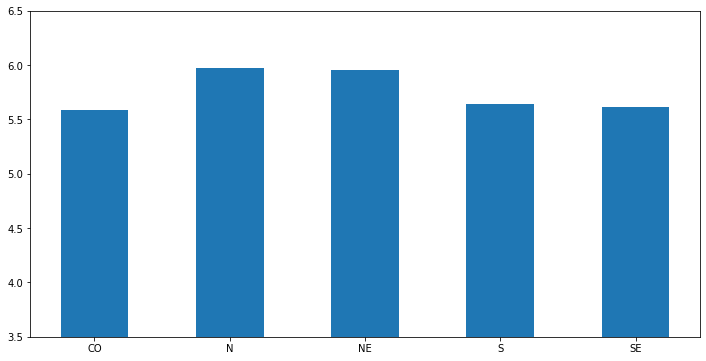

In [ ]:
barWidth = 0.5
plt.figure(figsize = (12,6))
r1 = np.arange(len(med_gasolina['Regiao - Sigla']))
plt.bar(r1, med_gasolina['Valor de Venda'], width = barWidth, align='center')
plt.xticks(np.arange(len(med_gasolina['Regiao - Sigla'])), med_gasolina['Regiao - Sigla'].tolist())
plt.ylim(3.5,6.5);

Pelo gráfico podemos notar que a média de preços da região Nordeste é bem próxima à da região Norte. 

##<font color ='#DAA520'><b>8. Qual a região que possui o menor valor médio do etanol?</b></font>

Semelhante à pergunta anterior, podemos responder em valores absolutos ou em forma de gráfico.

In [ ]:
med_etanol = dados_etanol.groupby(['Regiao - Sigla', 'Produto']).mean('Valor de Venda')

min_etanol = med_etanol.loc[[med_etanol['Valor de Venda'].idxmin()]]

min_etanol

,,Valor de Venda
Regiao - Sigla,Produto,
CO,ETANOL,4.107305


In [ ]:
med_etanol.reset_index(inplace = True)

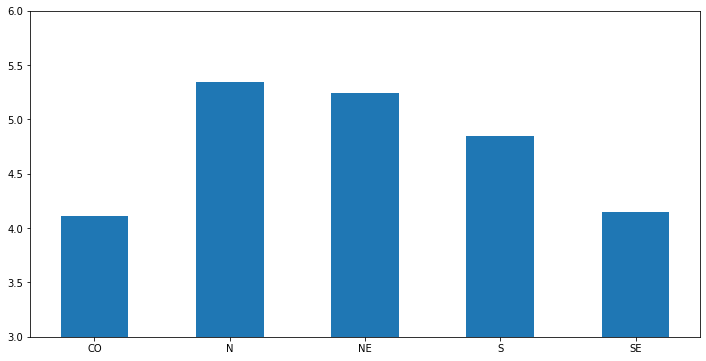

In [ ]:
barWidth = 0.5
plt.figure(figsize = (12,6))
r1 = np.arange(len(med_etanol['Regiao - Sigla']))
plt.bar(r1, med_etanol['Valor de Venda'], width = barWidth, align='center')
plt.xticks(np.arange(len(med_etanol['Regiao - Sigla'])), med_etanol['Regiao - Sigla'].tolist())
plt.ylim(3,6);

É possível notar que a região sudeste vem logo em seguida da região centro-oeste com os menores valores de etanol. 

##<font color ='#DAA520'><b>9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?</b></font>

Vendo a variação de preços de região para região, podemos nos perguntar se esses fatores influenciam nos preços dos combustíveis. Para isso, iremos calcular a correlação entre preço e região. 


In [ ]:
valor_regiao = conj_dados[['Regiao - Sigla', 'Produto', 'Valor de Venda']]

Para calcular a correlação, tanto numericamente quanto para a execução do gráfico de *heatmap* precisamos que as varáveis sejam quantitativas, ou seja, que elas sejam representadas por um valor. Sabemos que são 5 as regiões, por isso iremos atribuir um valor de 0 a 4 para cada uma das regiões. 

In [ ]:
def mapeando_regioes(df):
  a = valor_regiao['Regiao - Sigla'].unique()
  c = 0
  for i in a:
    df['Regiao - Sigla'] = df['Regiao - Sigla'].replace(i, c)
    c = c +1

mapeando_regioes(valor_regiao)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


É necessário realizar o mesmo procedimento para os produtos. É sabido que exitem apenas 3 produtos diferentes no Dataset: Etanol, Gasolina e Gasolina Aditivada, mas para essa análise, separamos apenas em Etanol e Gasolina, uma vez que o valor da gasolina aditivada é muito semelhante ao da gasolina e varia sempre na mesma proporção.

In [ ]:
valor_regiao['Produto'] = valor_regiao['Produto'].apply(lambda x: 1 if x == 'ETANOL' else 2 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
valor_regiao.head()

,Regiao - Sigla,Produto,Valor de Venda
0,0,2,7.48
1,0,2,7.38
2,0,1,5.99
3,0,2,7.39
4,1,2,6.49


Com os dados devidamente mapeados, podemos calcular a tabela de correlação.

In [ ]:
corr = valor_regiao.corr()
corr

,Regiao - Sigla,Produto,Valor de Venda
Regiao - Sigla,1.000000,0.095309,0.279721
Produto,0.095309,1.000000,0.703472
Valor de Venda,0.279721,0.703472,1.000000


Pela tabela, podemos inferir que há uma correlação alta entre o produto e o valor de venda, mas não enre o valor e a região.

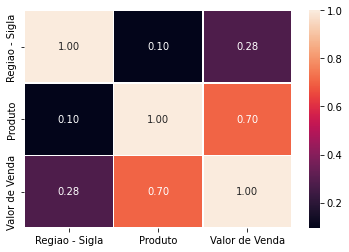

In [ ]:
plot1 = sn.heatmap(corr, annot = True, fmt=".2f", linewidths=.6);

Pelo heatmap fica evidente que a correlação entre produto e região é baixíssima. Portanto, a Região não influencia no preço do combustível.

##<font color ='#DAA520'><b>10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?</b></font>

Podemos pensar também se existe dependência entre outras duas variáveis, por exemplo:

Mais uma vez, vamos selecionar em um novo *subset* apenas as colunar relevantes para a análise: Bandeira, Produto e Valor de Venda.

In [ ]:
valor_bandeira = conj_dados[['Bandeira', 'Produto', 'Valor de Venda']]

O procedimento é identico à analise anterior. A diferença é que existem 49 bandeiras diferentes. Iremos atribuir um valor de 0 a 48 para cada uma dessas bandeiras diferentes. E para isso criamos uma função:

In [ ]:
a = valor_bandeira['Bandeira'].unique()
len(a)

49

In [ ]:
def mapeando(df):
  a = valor_bandeira['Bandeira'].unique()
  c = 0
  for i in a:
    df['Bandeira'] = df['Bandeira'].replace(i, c)
    c = c +1

mapeando(valor_bandeira)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Abaixo podemos ver que os valores para "Bandeira" agora são numéricos:

In [ ]:
valor_bandeira['Bandeira'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [ ]:
valor_bandeira['Produto'] = valor_bandeira['Produto'].apply(lambda x: 1 if x == 'ETANOL' else 2 )
valor_bandeira

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Bandeira,Produto,Valor de Venda
0,0,2,7.48
1,0,2,7.38
2,0,1,5.99
3,0,2,7.39
4,1,2,6.49
...,...,...,...
127171,1,1,3.99
127172,1,2,5.19
127173,1,2,5.19
127174,2,2,5.27


Com os dados prontos, podemos calcular a tabela de correlação entre as varáveis

In [ ]:
corr = valor_bandeira.corr()
corr

,Bandeira,Produto,Valor de Venda
Bandeira,1.000000,0.016663,0.035793
Produto,0.016663,1.000000,0.703472
Valor de Venda,0.035793,0.703472,1.000000


Podemos observar que existe uma correlação entre o valor de venda e o do produto, como é de se esperar, uma vez que o valor do etanol e da gasolina são bem diferentes, mas não existe correlação significativa entre o valor de venda e a bandeira (0.03). A vizualização em forma de *heatmap* pode ser observada logo abaixo

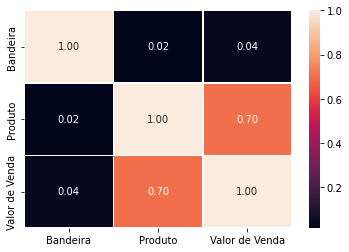

In [ ]:
plot1 = sn.heatmap(corr, annot = True, fmt=".2f", linewidths=.6);

Isso nos leva a concluir que o preço da gasolina e do etanol não varia significativamente de acordo com a bandeira que o vende. 

#<font color ='#DAA520'><b>Outras perguntas que nos permitem tirar mais dados relevantes do *dataset* 👩‍💻</b></font>

##<font color ='#DAA520'><b>11. Quais os estados que valem mais a pena para abastecer com gasolina? E com etanol?</b></font>

Segundo o Inmetro, existe um cálculo tomado como padrão para saber se o álcool leva vantagem sobre a gasolina. O cálculo considera o preço do litro do álcool dividido pelo preço da gasolina deve ser igual ou inferior a 0,7 a 70%. Para esse cálculo, consideraremos as medias de preço por estado nos meses de julho e agosto. 

In [ ]:
preco_medio_estado= conj_dados.groupby(['Data da Coleta', 'Estado - Sigla', 'Produto']).mean('Valor de Venda')
preco_medio_estado.reset_index(inplace = True)
preco_medio_estado['Mês'] = preco_medio_estado['Data da Coleta'].dt.month
preco_medio_estado_mes = preco_medio_estado.groupby(['Mês', 'Estado - Sigla', 'Produto']).mean('Valor de Venda')
preco_medio_estado_mes.reset_index(inplace = True)
preco_medio_estado_mes.sort_values(['Mês', 'Estado - Sigla'])

,Mês,Estado - Sigla,Produto,Valor de Venda
0,7,AC,ETANOL,5.681418
1,7,AC,GASOLINA,6.474007
2,7,AC,GASOLINA ADITIVADA,6.510219
3,7,AL,ETANOL,5.562701
4,7,AL,GASOLINA,6.381061
...,...,...,...,...
157,8,SP,GASOLINA,5.293588
158,8,SP,GASOLINA ADITIVADA,5.516719
159,8,TO,ETANOL,4.916533
160,8,TO,GASOLINA,5.719055


In [ ]:
preco_medio_estado_mes_gasolina = preco_medio_estado_mes.loc[(preco_medio_estado_mes['Produto'] == 'GASOLINA')].sort_values(['Mês', 'Estado - Sigla'])
preco_medio_estado_mes_etanol = preco_medio_estado_mes.loc[(preco_medio_estado_mes['Produto'] == 'ETANOL')].sort_values(['Mês', 'Estado - Sigla'])
preco_medio_estado_mes_etanol.reset_index(inplace=True)
preco_medio_estado_mes_gasolina.reset_index(inplace=True)

Calculamos a razão entre o preço do etanol e da gasolina e o adicionamos numa coluna chamad proporção no dataframe com as informações do etanol:

In [ ]:
def dividir(df1, df2):
  df1['Porcentagem'] = df1['Valor de Venda'] / df2 ['Valor de Venda']

dividir(preco_medio_estado_mes_etanol, preco_medio_estado_mes_gasolina)

Separamo o dataset em 2: os correspondentes ao mês de julho e ao mês de agosto, para avaliarmos separadamente.

In [ ]:
preco_julho = preco_medio_estado_mes_etanol[preco_medio_estado_mes_etanol['Mês'] == 7]
preco_agosto= preco_medio_estado_mes_etanol[preco_medio_estado_mes_etanol['Mês'] == 8]

E então plotamos oo gráfico. A linha vermelha indica o valor de 0,7 como resultado da divisão. as barras acima dela nos dizem que naquele estado e mês não valia a pena abastecer o carro ocm etanol no lugar da gasolina. Já as barras abaixo indicam que é melhor abastecer com etanol 

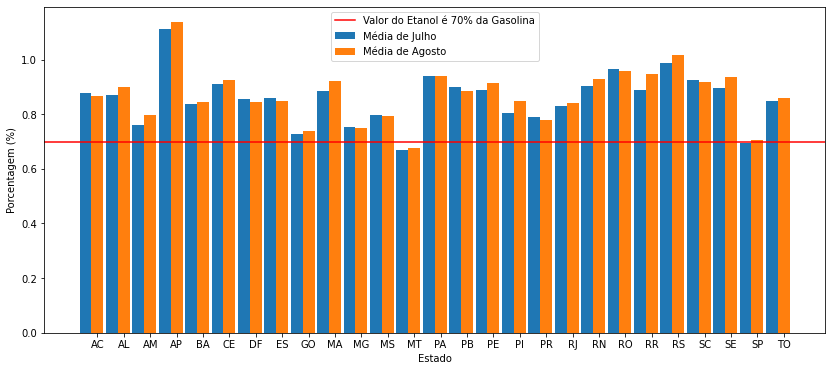

In [ ]:
barWidth = 0.45
plt.figure(figsize = (14,6))
r1 = np.arange(len(preco_julho['Mês']))
r2 = [x + barWidth for x in r1]
plt.bar(r1, preco_julho['Porcentagem'], label = 'Média de Julho', width = barWidth)
plt.bar(r2, preco_agosto['Porcentagem'], label = 'Média de Agosto', width = barWidth)
plt.xlabel('Estado')
plt.ylabel('Porcentagem (%)')
plt.xticks([r + barWidth for r in range(len(preco_julho['Mês']))], preco_julho['Estado - Sigla'].tolist())
plt.axhline(y=0.7, color = 'red', dash_capstyle = 'butt', label = 'Valor do Etanol é 70% da Gasolina')
plt.legend();

Apenas no estadi de MT era vantajoso substituir a gasolina por etanol em ambos os meses avaliados. 

##<font color ='#DAA520'><b>12. Qual estado que tem a maior e a menor variação de preço do etanol e da gasolina?</b></font>

###<font color ='#DAA520'><b>ETANOL</b></font>


In [ ]:
et_var = conj_dados.loc[(conj_dados['Produto']=='ETANOL')]
et_var = et_var.groupby(['Estado - Sigla', 'Produto']).mean('Valor de Venda')

et_var = et_var.pct_change()#calcular a variação 

et_var = et_var.sort_values('Valor de Venda')

et_var 

,,Valor de Venda
Estado - Sigla,Produto,
SP,ETANOL,-0.235012
MG,ETANOL,-0.202822
GO,ETANOL,-0.181956
BA,ETANOL,-0.139392
MT,ETANOL,-0.136537
DF,ETANOL,-0.133697
PR,ETANOL,-0.113204
PB,ETANOL,-0.092767
SC,ETANOL,-0.078809


#### <font color ='#DAA520'><b>Os estados com a  menor variação de etanol:</b></font>


In [ ]:
et_var.head()#filtra as 5 primeiras linhas

,,Valor de Venda
Estado - Sigla,Produto,
SP,ETANOL,-0.235012
MG,ETANOL,-0.202822
GO,ETANOL,-0.181956
BA,ETANOL,-0.139392
MT,ETANOL,-0.136537


#### <font color ='#DAA520'><b>Os estados com a  maior variação de etanol:</b></font>


In [ ]:
et_var.tail()#filtra as 5 últimas linhas

,,Valor de Venda
Estado - Sigla,Produto,
AP,ETANOL,0.190444
MA,ETANOL,0.313149
TO,ETANOL,0.322211
PA,ETANOL,0.478003
AC,ETANOL,NaN


#### <font color ='#DAA520'><b>Gráfico da variação dos valores de venda do etanol</b></font>


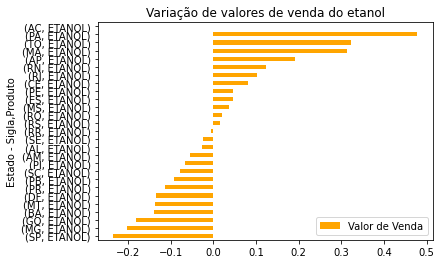

In [ ]:
et_var.plot(kind="barh", title="Variação de valores de venda do etanol",
        color={"orange"})
plt.show();

###<font color ='#DAA520'><b>GASOLINA</b></font>


In [ ]:
gas_var = conj_dados.loc[(conj_dados['Produto']=='GASOLINA')]
gas_var = gas_var.groupby(['Estado - Sigla', 'Produto']).mean('Valor de Venda')

gas_var = gas_var.pct_change()#calcular a variação 
gas_var = gas_var.sort_values('Valor de Venda')

gas_var

,,Valor de Venda
Estado - Sigla,Produto,
AP,GASOLINA,-0.174690
PR,GASOLINA,-0.073128
RS,GASOLINA,-0.066627
DF,GASOLINA,-0.059546
GO,GASOLINA,-0.047852
MG,GASOLINA,-0.047011
PB,GASOLINA,-0.044285
AL,GASOLINA,-0.042953
RO,GASOLINA,-0.032527


####<font color ='#DAA520'><b>Estados com menor variação no valor da gasolina</b></font>


In [ ]:
gas_var.head()

,,Valor de Venda
Estado - Sigla,Produto,
AP,GASOLINA,-0.174690
PR,GASOLINA,-0.073128
RS,GASOLINA,-0.066627
DF,GASOLINA,-0.059546
GO,GASOLINA,-0.047852


####<font color ='#DAA520'><b>Estados com maior variação no valor da gasolina</b></font>


In [ ]:
gas_var.tail()

,,Valor de Venda
Estado - Sigla,Produto,
PA,GASOLINA,0.058857
MA,GASOLINA,0.077973
TO,GASOLINA,0.093781
BA,GASOLINA,0.180888
AC,GASOLINA,NaN


####<font color ='#DAA520'><b>Gráfico da varianção dos valores de venda da gasolina</b></font>


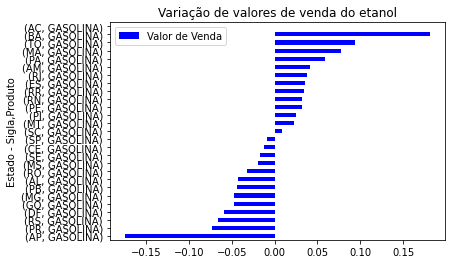

In [ ]:
gas_var.plot(kind="barh", title="Variação de valores de venda do etanol",
        color={"Blue"})
plt.show();